<a href="https://colab.research.google.com/github/Azamat2023/Data-science-and-AI/blob/master/19_UNSUPERVISED_LEARNING_CLUSTERING_19_8_YAKUNIY_AMALIY_VAZIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#**19-modul. Unsupervised learning. Clustering**
# 19.8. Modul boʻyicha yakuniy amaliy vazifa. Mijozlarni xarajat turlariga qarab segmentlash

**Ushbu vazifa orqali siz:**

✔️ klasterlash;

✔️ maʼlumotlarni normallashtirish;

✔️ klaster tahlili;

✔️ vizualizatsiya kabi real data sayns loyihalari uchun zarur texnik ko‘nikmalarga ega bo‘lasiz.

## **Dataset: Wholesale Customers Data**  
- **Manba:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  
- **Hajmi:** **22 KB**
- **Format:** CSV  
- **Tavsif:** bu dataset **ulgurji savdo mijozlarini** xarajatlar bo‘yicha klasterlash uchun ishlatiladi.  
  U quyidagi xarajat kategoriyalarini o‘z ichiga oladi:  
  - **channel** (mijoz turi: 1 – HoReCa (mehmonxona, restoran, kafelar) yoki 2 – chakana savdo)  
  - **region** (hudud: 1 – Lisbon, 2 – Oporto, 3 – boshqa)  
  - **fresh** (yangi mahsulotlarga sarf qilingan summa)  
  - **milk** (sut mahsulotlariga sarf qilingan summa)  
  - **grocery** (oziq-ovqat mahsulotlariga sarf qilingan summa)  
  - **frozen** (muzlatilgan mahsulotlarga sarf qilingan summa)  
  - **Detergents_Paper** (kimyoviy tozalash va qog‘oz mahsulotlari)  
  - **delicassen** (delikates mahsulotlar)  

---

### **Vazifa: mijozlarni xarajat turlariga qarab segmentlash**  
Maqsad – **mijozlarni xarajat qiladigan mahsulotlar bo‘yicha klasterlash va marketologlarga tavsiyalar berish**  

---

### **Klasterlash bosqichlari**  
1) **Maʼlumotlarni tayyorlash**  
   - `Channel` va `Region` ustunlarini olib tashlang yoki kodlang.  
   - Har bir xarajat ustunini **normalizatsiya qiling**.  

2) **K-means klasterlashni amalga oshirish**  
   - K-means yordamida mijozlarni **xarajat qilish odatlari** bo‘yicha segmentlarga ajrating.  

3) **Natijalarni vizualizatsiya qilish**  
   - **Pairplot yoki scatter plot** yordamida klasterlarni ko‘rsating.  
   - Har bir segmentning xarajatlar bo‘yicha o‘rtacha qiymatini diagrammada aks ettiring.

---

###*** ESLATMA**: *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [19]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

C:\Users\User\ANACONDA\envs\California_Inc\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


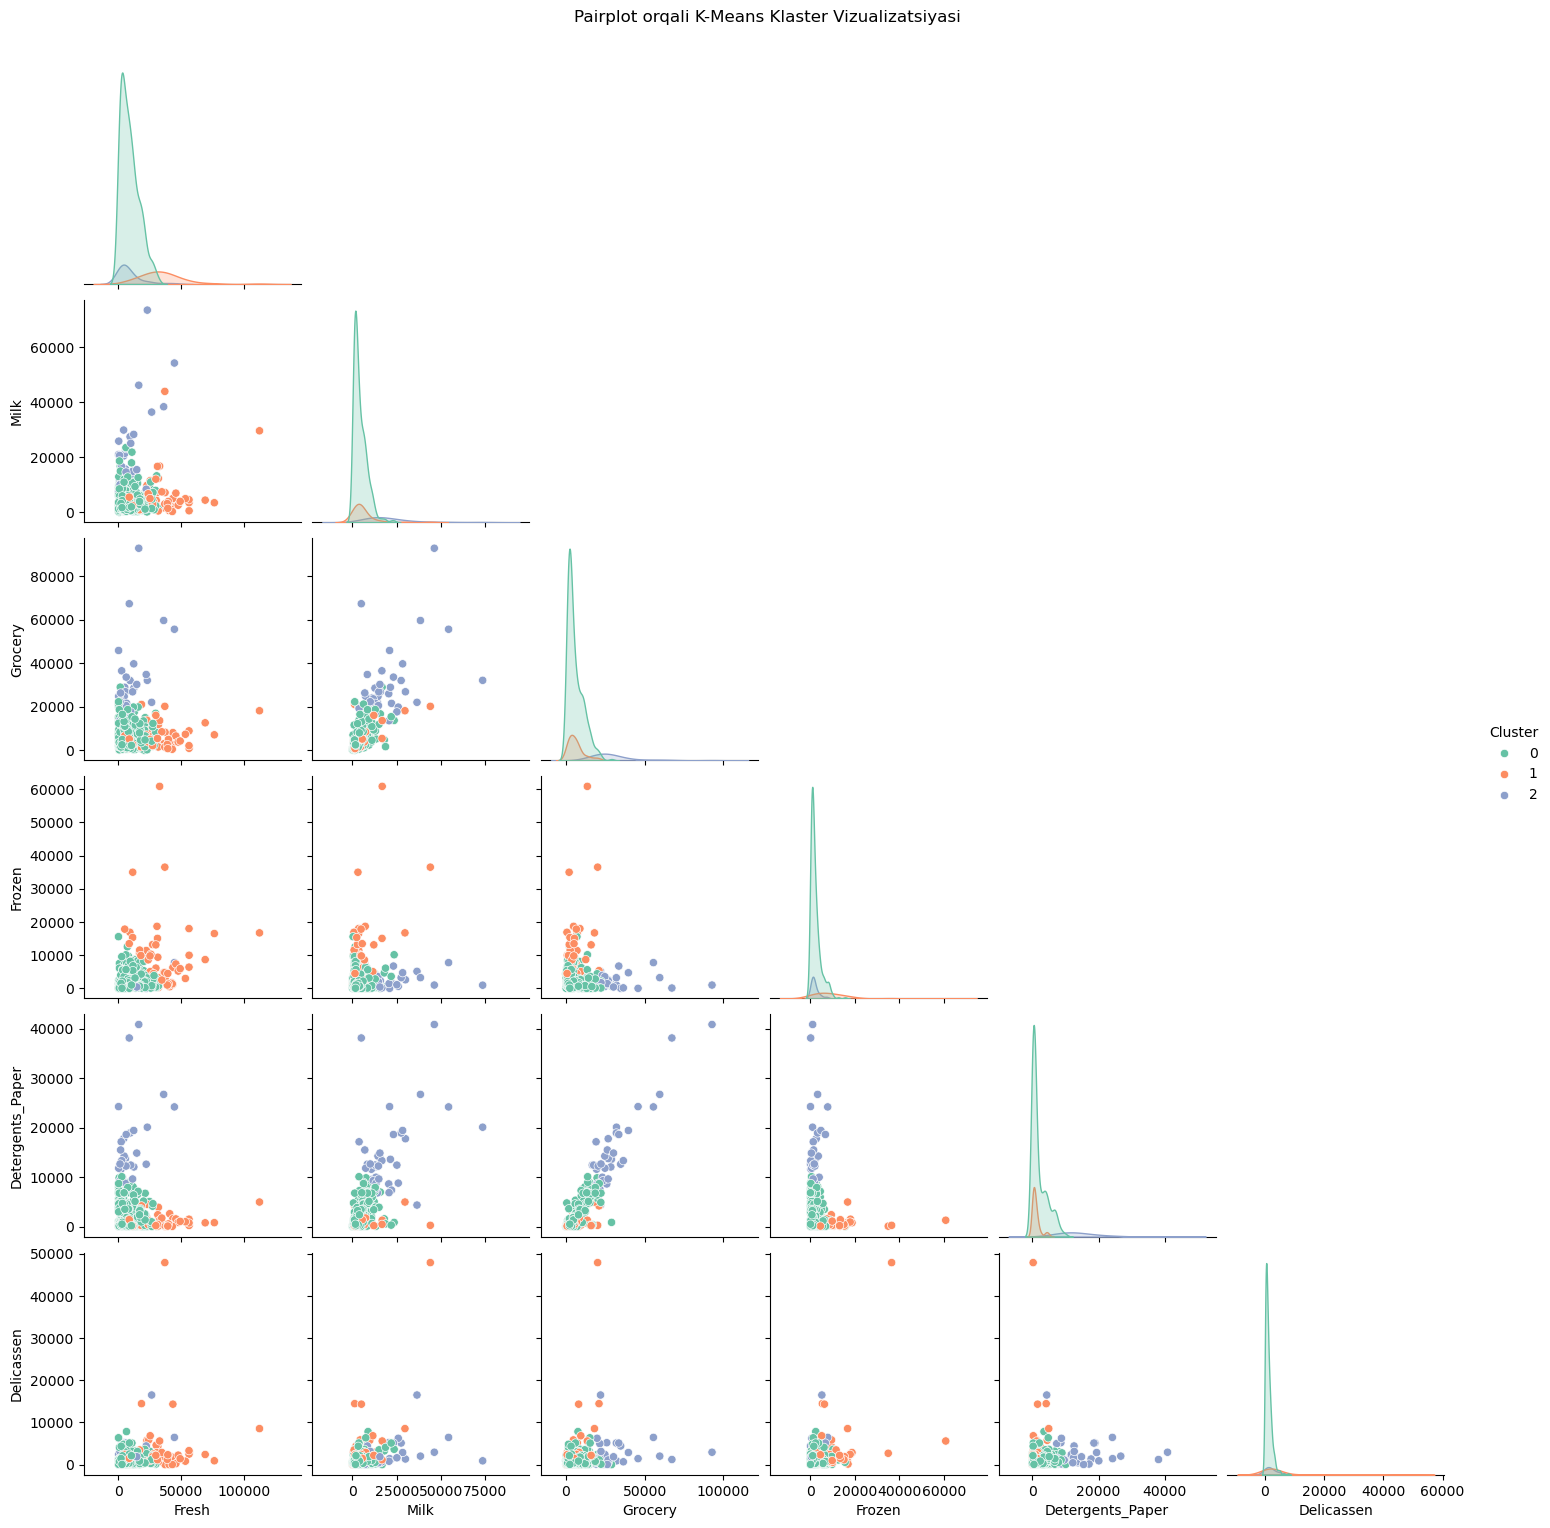

<Figure size 1200x600 with 0 Axes>

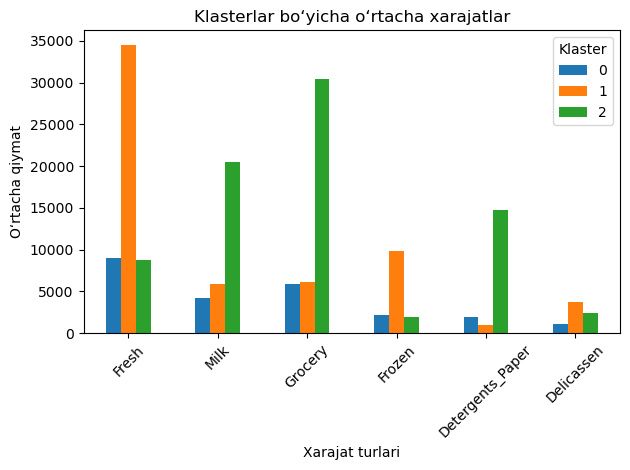

In [21]:
# 1. Kutubxonalarni chaqirish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv('https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv')
df_clean = df.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_clean['Cluster'] = clusters

df_plot = df_clean.copy()
df_plot['Cluster'] = df_plot['Cluster'].astype(str)

sns.pairplot(df_plot, hue='Cluster', palette='Set2', corner=True)
plt.suptitle('Pairplot orqali K-Means Klaster Vizualizatsiyasi', y=1.02)
plt.show()

cluster_means = df_clean.groupby('Cluster').mean()

plt.figure(figsize=(12, 6))
cluster_means.T.plot(kind='bar')
plt.title('Klasterlar bo‘yicha o‘rtacha xarajatlar')
plt.xlabel('Xarajat turlari')
plt.ylabel('O‘rtacha qiymat')
plt.legend(title='Klaster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()